In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

ModuleNotFoundError: ignored

In [ ]:
boston=pd.read_csv('/content/drive/MyDrive/pyhton/dataset/crime.csv',na_values='missing', encoding='latin1')
boston

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [ ]:
boston.columns=[x.upper() for x in boston.columns]
boston.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'LAT', 'LONG', 'LOCATION'],
      dtype='object')

In [ ]:
boston.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
LAT                     19999
LONG                    19999
LOCATION                    0
dtype: int64

In [ ]:
boston.shape

(319073, 17)

In [ ]:
boston=boston.drop(columns='SHOOTING',axis=0)

In [ ]:
boston.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10871
LAT                    19999
LONG                   19999
LOCATION                   0
dtype: int64

In [ ]:
boston.dropna(subset=['DISTRICT'],inplace=True)
boston.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                  9824
LAT                    19715
LONG                   19715
LOCATION                   0
dtype: int64

In [ ]:
boston.dropna(subset=['STREET'],inplace=True)
boston.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                     0
LAT                    10821
LONG                   10821
LOCATION                   0
dtype: int64

In [ ]:
boston.dropna(subset=['LAT'],inplace=True)
boston.isna().sum()

INCIDENT_NUMBER         0
OFFENSE_CODE            0
OFFENSE_CODE_GROUP      0
OFFENSE_DESCRIPTION     0
DISTRICT                0
REPORTING_AREA          0
OCCURRED_ON_DATE        0
YEAR                    0
MONTH                   0
DAY_OF_WEEK             0
HOUR                    0
UCR_PART               90
STREET                  0
LAT                     0
LONG                    0
LOCATION                0
dtype: int64

In [ ]:
boston.dropna(subset=['UCR_PART'],inplace=True)
boston.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
LAT                    0
LONG                   0
LOCATION               0
dtype: int64

In [ ]:
boston.shape


(296573, 16)

In [ ]:
boston[boston['LAT']==-1.000000].count()

INCIDENT_NUMBER        152
OFFENSE_CODE           152
OFFENSE_CODE_GROUP     152
OFFENSE_DESCRIPTION    152
DISTRICT               152
REPORTING_AREA         152
OCCURRED_ON_DATE       152
YEAR                   152
MONTH                  152
DAY_OF_WEEK            152
HOUR                   152
UCR_PART               152
STREET                 152
LAT                    152
LONG                   152
LOCATION               152
dtype: int64

In [ ]:
boston=boston[~(boston['LAT']==-1.000000)]




In [ ]:
boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
boston.shape

(296421, 16)

In [ ]:
boston[boston['LAT']==-1.000000]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION


In [ ]:
boston.shape

(296421, 16)

In [ ]:
boston[boston['LAT'].isna()].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION


In [ ]:
boston

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [ ]:
district=boston['DISTRICT']
district

0         D14
1         C11
2          D4
3          D4
4          B3
         ... 
319068     D4
319069    E18
319070    E18
319071    E13
319072     D4
Name: DISTRICT, Length: 296421, dtype: object

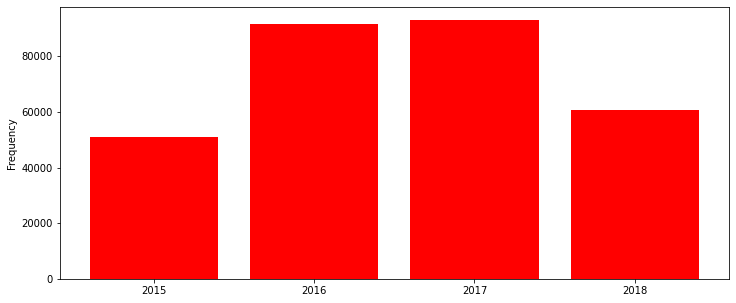

In [ ]:
boston_year=boston['YEAR']
boston_year_value=boston_year.value_counts() # splits series into unique groubyps and counts values for each of them
plt.figure(figsize=(12,5))
plt.bar(boston_year_value.index, boston_year_value, color='red')
plt.xticks(boston_year_value.index, boston_year_value.index.values)
plt.ylabel('Frequency')
plt.xlabel('',color='blue')

plt.show()

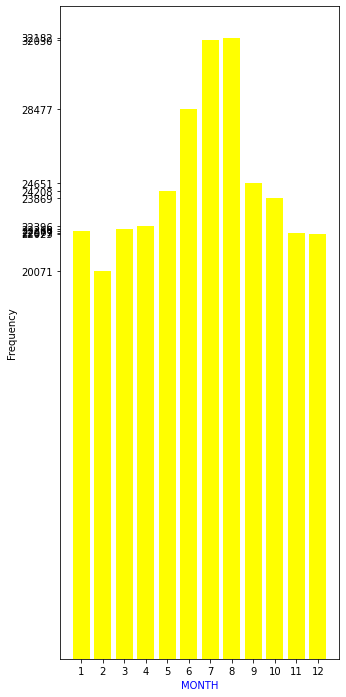

In [ ]:
boston_month=boston['MONTH']
boston_month_value=boston_month.value_counts() # splits series into unique groubyps and counts values for each of them
plt.figure(figsize=(5,12))
plt.bar(boston_month_value.index, boston_month_value, color='yellow')
plt.xticks(boston_month_value.index, boston_month_value.index.values)
plt.yticks(boston_month_value, boston_month_value.values)
plt.ylabel('Frequency')
plt.xlabel('MONTH',color='blue')

plt.show()

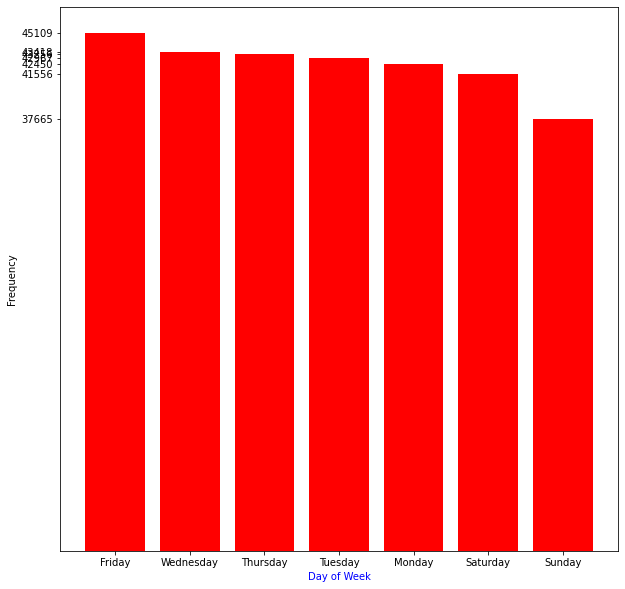

In [ ]:
boston_day_of_w=boston['DAY_OF_WEEK']
boston_day_of_w_v=boston_day_of_w.value_counts() # splits series into unique groubyps and counts values for each of them
plt.figure(figsize=(10,10))
plt.bar(boston_day_of_w_v.index, boston_day_of_w_v, color='red')
plt.xticks(boston_day_of_w_v.index, boston_day_of_w_v.index.values)
plt.yticks(boston_day_of_w_v, boston_day_of_w_v.values)
plt.ylabel('Frequency')
plt.xlabel('Day of Week',color='blue')

plt.show()

In [ ]:
boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


Text(0.5, 0, 'District')

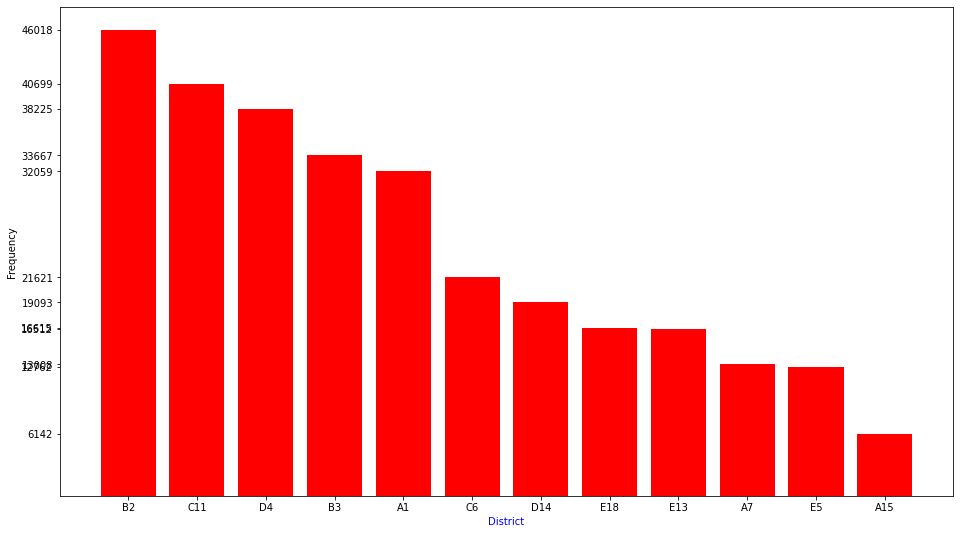

In [ ]:
district=boston['DISTRICT'].unique()
v_district=boston['DISTRICT']
boston_district_value=v_district.value_counts() 
plt.figure(figsize=(16,9))
plt.bar(boston_district_value.index, boston_district_value, color='red')
plt.xticks(boston_district_value.index, boston_district_value.index.values)
plt.yticks(boston_district_value, boston_district_value.values)
plt.ylabel('Frequency')
plt.xlabel('District',color='blue')



In [ ]:
boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296421 entries, 0 to 319072
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      296421 non-null  object 
 1   OFFENSE_CODE         296421 non-null  int64  
 2   OFFENSE_CODE_GROUP   296421 non-null  object 
 3   OFFENSE_DESCRIPTION  296421 non-null  object 
 4   DISTRICT             296421 non-null  object 
 5   REPORTING_AREA       296421 non-null  object 
 6   OCCURRED_ON_DATE     296421 non-null  object 
 7   YEAR                 296421 non-null  int64  
 8   MONTH                296421 non-null  int64  
 9   DAY_OF_WEEK          296421 non-null  object 
 10  HOUR                 296421 non-null  int64  
 11  UCR_PART             296421 non-null  object 
 12  STREET               296421 non-null  object 
 13  LAT                  296421 non-null  float64
 14  LONG                 296421 non-null  float64
 15  LOCATION         

In [ ]:

boston['LAT']

0         42.357791
1         42.306821
2         42.346589
3         42.334182
4         42.275365
            ...    
319068    42.336951
319069    42.255926
319070    42.255926
319071    42.302333
319072    42.333839
Name: LAT, Length: 296421, dtype: float64

In [ ]:
boston_loc=boston['LOCATION']
boston_loc
boston_loc=boston_loc.str[1:-1]
boston_loc=boston_loc.str.replace(', ',',')
boston_loc=boston_loc.str.split(',')
xlist=[]
ylist=[]


for i in boston_loc:
    xlist.append(np.float64(i[0]))
    ylist.append(np.float64(i[1]))
x=pd.Series(xlist)
y=pd.Series(ylist)

# fig,ax = plt.subplots(figsize=(25,5))
# ax.plot(x,y)
plt.plot(x,y)

plt.show()



OverflowError: ignored

<Figure size 432x288 with 1 Axes>

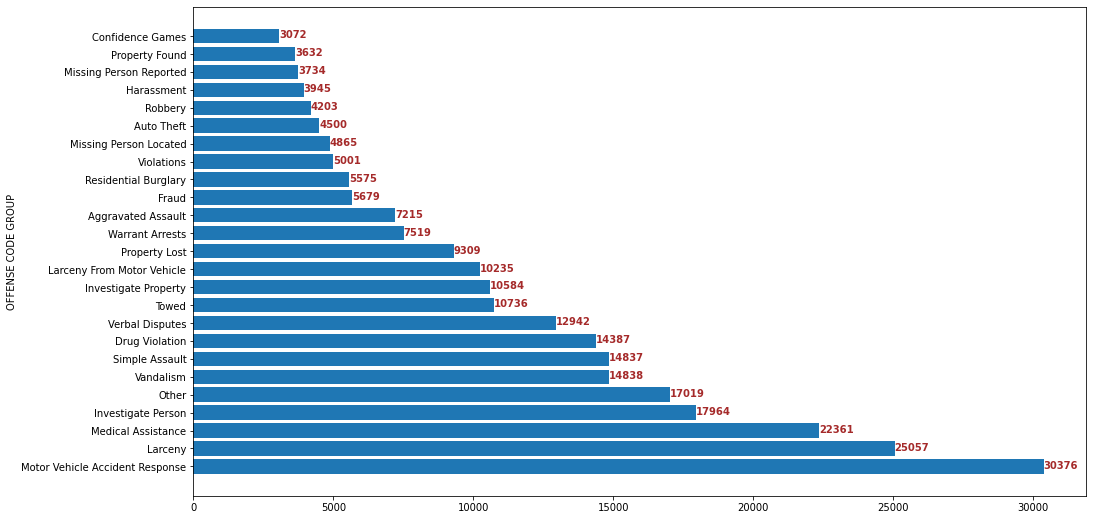

In [ ]:
crime=boston['OFFENSE_CODE_GROUP'].value_counts()
crime.sort_values
crime=crime.head(25)
v_index=crime.index
v_value=crime.values




fig, ax = plt.subplots(figsize=(16, 9))
ax.set_ylabel('OFFENSE CODE GROUP')
ax.barh(v_index,v_value)
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='brown')
plt.show()

In [ ]:
boston

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
